In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa46e7001f0>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [10]:
import datetime as dt

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

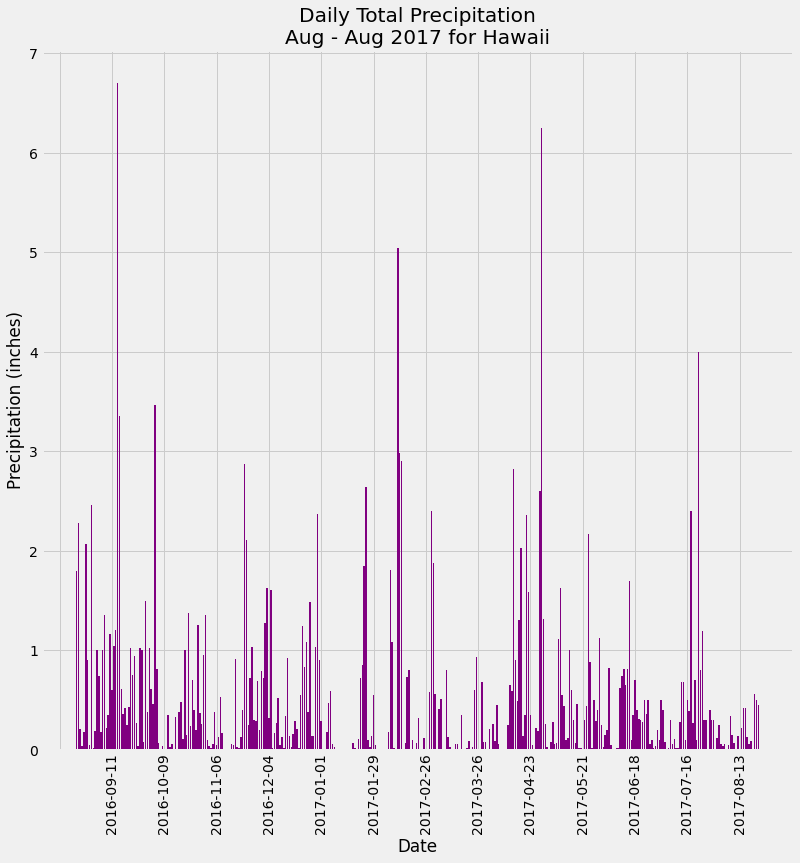

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print(year_ago)
# Perform a query to retrieve the data and precipitation scores
#sel = [Measurement.date, 
       #func.sum(Measurement.prcp)]

lastyear_data = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= year_ago).order_by(Measurement.date).all()
#lastyear_data
# Save the query results as a Pandas DataFrame and set the index to the date column
query_df = pd.DataFrame(lastyear_data, columns=['date', 'prcp'])
#query_df
# Sort the dataframe by date
query_df.set_index('date', inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
#query_df.plot.bar()
#plt.tight_layout()
#plt.show()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(query_df.index.values,
       query_df['prcp'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nAug - Aug 2017 for Hawaii")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.xticks(rotation = 90)

plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
query_df.describe(include='all')

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).\
        all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

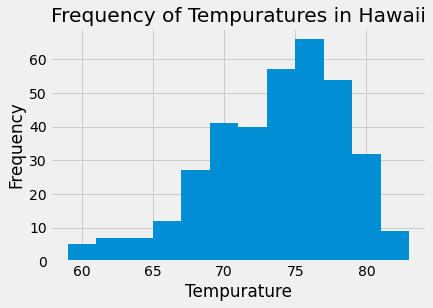

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).filter(Measurement.station == 'USC00519281').first()
year_ago = dt.date(2017, 8, 18) - dt.timedelta(days=365)

temp_data = session.query(Measurement.tobs).filter(Measurement.date >= year_ago).filter(Measurement.station == 'USC00519281').all()
temp_data_df = pd.DataFrame(temp_data)

bins = [0, 60, 65, 70, 75, 80, 100]
labels = ['0-60','60-65','65-70','70-75','75-80','80-100']

#temp_data_df["Temp Group"] = pd.cut(temp_data_df["tobs"], bins, labels=labels)
#temp_data_df


fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(temp_data_df['tobs'], bins=12)
ax.set(xlabel="Tempurature",
       ylabel="Frequency",
       title="Frequency of Tempuratures in Hawaii")
plt.show()


# Close session

In [18]:
# Close Session
session.close()